<a href="https://colab.research.google.com/github/kurasaiteja/Whatsapp-Analysis/blob/master/Whatsapp_Group_Chat_Analysis_for_iOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Whatsapp Group Chat Data Analysis using python.

Hey there! This a project which would keep evolving with time.

A typical data science project would involve 5 steps. The first step is Data Collection. In this case Data collection involves

Opening Whatsapp group chat.
Go to Settings.
Click on Export Chat.
Click on without media.

In [337]:
!pip install emoji

In [338]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline

In [339]:
! git clone https://github.com/amueller/word_cloud.git
% cd word_cloud
! pip install .

Cloning into 'word_cloud'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 5773 (delta 33), reused 46 (delta 3), pack-reused 5667
Receiving objects: 100% (5773/5773), 105.93 MiB | 31.06 MiB/s, done.
Resolving deltas: 100% (3368/3368), done.
/content/word_cloud/word_cloud/word_cloud/word_cloud/word_cloud/word_cloud/word_cloud
Processing /content/word_cloud/word_cloud/word_cloud/word_cloud/word_cloud/word_cloud/word_cloud
  Created wheel for wordcloud: filename=wordcloud-1.6.0.post88+ge196d19-cp36-cp36m-linux_x86_64.whl size=338618 sha256=e5e4a545a1c3b1e5ecea6bc95abd95496c7eedee36bb57e7aac36280ea6288a1
  Stored in directory: /tmp/pip-ephem-wheel-cache-3v6m5flm/wheels/ef/e6/a3/c2eb75aff2d68524e547b862696266f4c0fa0189eb80c67e87
Successfully built wordcloud
  Found existing installation: wordcloud 1.6.0.post88+ge196d19
    Uninstalling wordcloud-1.6.0.post88+ge196d19:
      Successfull

# **Data Preparation:**


This plain text file will have to be parsed and tokenized in a meaningful manner in order to be served (stored) in a Pandas dataframe.

Let us consider just a single line from the text (which we will call “raw text”) and see how we can extract relevant columns from it:

18/06/17, 9:47 PM - Teja: Why do you have 2 numbers?

In our sample line of text, our main objective is to automatically break down the raw message into 4 tokens.

{Date}, {Time} - {Author}: {Message}

{18/06/17}, {9:47 PM} - {Teja}: {Why do you have 2 numbers?}






In [340]:
def startsWithDateAndTime(s):
    pattern = '^\[([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9][0-9]):([0-9][0-9]) (AM|PM|am|pm)?\]'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [341]:
startsWithDateAndTime("[10/07/20, 12:37:19 AM] Gowtham Vce: vere pani undadai")

True

In [410]:
startsWithDateAndTime(res)
res

'\u200e[10/07/20, 1:17:46 AM] Gowtham Vce: \u200esticker omitted'

In [411]:
print(res)

‎[10/07/20, 1:17:46 AM] Gowtham Vce: ‎sticker omitted


In [412]:
res

'\u200e[10/07/20, 1:17:46 AM] Gowtham Vce: \u200esticker omitted'

In [343]:
def FindAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([\w]+)[\u263a-\U0001f999]+:',    # Name and Emoji              
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [344]:
def getDataPoint(line):   
    splitLine = line.split('] ')
    dateTime = splitLine[0]
    date, time = dateTime.split(',') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message


In [414]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = '/content/_chat 2.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    fp.readline()
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break 
        line = line.strip()
        line = (line.encode('ascii', 'ignore')).decode("utf-8")
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

Nen kuda cheyle inke endi.. Em cheyalo ankunnadi petna
Mundu oddu.
Laptop ledhu 
Nak 105 peddha theda ledhu
me ayya em anle
It's a proud thing to us
Long questions
Nadi kuda almost anthe anko
Rr eh gelchindi
Emo Vishal ke teliyali
debugging techniques okkati levu
Manikanta ki em thelsu

Please go through the attached sheet to know your time slot for the final review presentation of Mini projects III (or Theme projects).

Date:
26thApril - Section B
27thApril - Section A

This is evaluated by external examiner so stick to your time slot and finish it on time. If you are not present at the venue 10 minutes before the slot, it will be passed to next in-line and you would get zero marks.

Mandatory checks before considering the project for evaluation:

The following have to be submitted and verified by the examiner 10 mins before your slot.

Submission of copy of the project report to the examiners(one copy per team). The format for the final report is given below. Your report should adher

In [415]:
import datetime
def dateconv(date):
  return datetime.datetime.strptime(date, "[%d/%m/%y").strftime("%Y-%m-%d")
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = df["Date"].apply(dateconv)
df["Date"] = pd.to_datetime(df["Date"])

In [416]:
df.head(15)

,Date,Time,Author,Message
0,2019-03-07,6:45:48 PM,Aakarsh Yelisetty,Arey
1,2019-03-07,6:45:58 PM,Aakarsh Yelisetty,Adhe chedham aa inka?
2,2019-03-07,6:46:15 PM,Gowtham Vce,Emaina ideas unte chep
3,2019-03-07,6:46:25 PM,Aakarsh Yelisetty,Gatti competition untadi
4,2019-03-07,6:46:40 PM,Aakarsh Yelisetty,Ipatkipud ante kashtam
5,2019-03-07,6:46:48 PM,Aakarsh Yelisetty,Chedham adhe inka
6,2019-03-07,6:46:53 PM,Gowtham Vce,Ok
7,2019-03-07,6:47:09 PM,Aakarsh Yelisetty,Implementation etla
8,2019-03-07,6:48:17 PM,Gowtham Vce,Chudali
9,2019-03-07,6:57:04 PM,Aakarsh Yelisetty,Web app eh kada


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35089 entries, 0 to 35088
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     35089 non-null  datetime64[ns]
 1   Time     35089 non-null  object        
 2   Author   35071 non-null  object        
 3   Message  35089 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.1+ MB


## Printing Participants

In [418]:
df.Author.unique()

array(['Aakarsh Yelisetty', 'Gowtham Vce', 'Vishal Vce', 'Sai Teja', None,
       'Manikanta'], dtype=object)

**None** which is the first element in array indicates few messages which do not have authors like,


*   Group was created.
*   Teja was added and so on.



Let us remove the messages created by None

In [419]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35071 entries, 0 to 35088
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     35071 non-null  datetime64[ns]
 1   Time     35071 non-null  object        
 2   Author   35071 non-null  object        
 3   Message  35071 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.3+ MB


In [420]:
df.Author.unique()

array(['Aakarsh Yelisetty', 'Gowtham Vce', 'Vishal Vce', 'Sai Teja',
       'Manikanta'], dtype=object)

We successfully removed None author.

# Group Wise Stats.

In [421]:
total_messages = df.shape[0]
print(total_messages)

35071


Let us now find out the total Media Messages

In [422]:
media_messages = df[df['Message'] == 'image omitted'].shape[0]
print(media_messages)

361


In [423]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)

In [424]:
emojis = sum(df['emoji'].str.len())
print(emojis)

0


In [425]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()


In [426]:
links = np.sum(df.urlcount)

In [427]:
print("Group Wise Stats")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Group Wise Stats
Messages: 35071
Media: 361
Emojis: 0
Links: 254


## Let us Separate the media messages and text messages and sticker messages

In [428]:
media_messages_df = df[df['Message'] == 'image omitted']

In [429]:
sticker_messages_df = df[df['Message'] == 'sticker omitted']
sticker_messages_df

,Date,Time,Author,Message,emoji,urlcount
34251,2020-07-07,1:34:29 PM,Aakarsh Yelisetty,sticker omitted,[],0
34268,2020-07-07,1:45:31 PM,Vishal Vce,sticker omitted,[],0
34271,2020-07-07,2:55:59 PM,Aakarsh Yelisetty,sticker omitted,[],0
34295,2020-07-07,9:30:23 PM,Vishal Vce,sticker omitted,[],0
34305,2020-07-07,9:50:03 PM,Sai Teja,sticker omitted,[],0
...,...,...,...,...,...,...
35060,2020-07-10,1:10:38 AM,Manikanta,sticker omitted,[],0
35071,2020-07-10,1:13:46 AM,Gowtham Vce,sticker omitted,[],0
35074,2020-07-10,1:14:09 AM,Gowtham Vce,sticker omitted,[],0
35077,2020-07-10,1:14:43 AM,Gowtham Vce,sticker omitted,[],0


In [430]:
messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(sticker_messages_df.index)

In [431]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34628 entries, 0 to 35088
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      34628 non-null  datetime64[ns]
 1   Time      34628 non-null  object        
 2   Author    34628 non-null  object        
 3   Message   34628 non-null  object        
 4   emoji     34628 non-null  object        
 5   urlcount  34628 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.8+ MB


It might be interesting to count the number of letters and words used by each author in each message. So, let us add 2 new columns to the data frame called “Letter_Count” and “Word_Count”, using the following code:

In [432]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [364]:
messages_df.tail()

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
34631,2020-07-10,10:18:57 AM,Manikanta,Em maatladthunnav ra\n,[],0,21,3,1
34632,2020-07-10,12:21:01 PM,Sai Teja,https://youtu.be/vOj5KLcymgA\n,[],1,29,1,1
34633,2020-07-10,12:21:11 PM,Sai Teja,Must watch!\n,[],0,12,2,1
34634,2020-07-10,12:23:09 PM,Sai Teja,Bathuku gurinchi cheptadu\n,[],0,26,3,1
34635,2020-07-10,12:33:04 PM,Vishal Vce,Yo chusta\n,[],0,10,2,1


In [365]:
messages_df["emojicount"]= df['emoji'].str.len()

#Author wise stats

In [366]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
l = messages_df.Author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of Aakarsh Yelisetty -
Messages Sent 5614
Words per message 4.037406483790524
Media Messages Sent 0
Emojis Sent 1373
Links Sent 79

Stats of Gowtham Vce -
Messages Sent 5994
Words per message 2.971805138471805
Media Messages Sent 0
Emojis Sent 1826
Links Sent 15

Stats of Vishal Vce -
Messages Sent 9698
Words per message 3.4588574963910084
Media Messages Sent 0
Emojis Sent 1409
Links Sent 55

Stats of Sai Teja -
Messages Sent 7820
Words per message 4.2423273657289
Media Messages Sent 0
Emojis Sent 850
Links Sent 54

Stats of Manikanta -
Messages Sent 5492
Words per message 4.353969410050984
Media Messages Sent 0
Emojis Sent 1185
Links Sent 51



# Most used Emoji in Group

# Emoji Stats

### Unique emojis used in group

In [367]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

186


### Most used emoji

In [368]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('😂', 2696), ('🤣', 1436), ('\U0001f97a', 394), ('😒', 209), ('🔥', 79), ('🙄', 78), ('😞', 68), ('\U0001f973', 64), ('🤦🏻\u200d♂️', 61), ('🤕', 53), ('🤙🏻', 46), ('😮', 46), ('🙂', 45), ('😪', 44), ('😭', 43), ('😢', 43), ('🤧', 40), ('🤦🏻\u200d♂', 37), ('😅', 35), ('😕', 35), ('😨', 34), ('😔', 34), ('😏', 32), ('🙃', 30), ('😎', 29), ('😱', 28), ('\U0001f975', 27), ('🙏', 27), ('🤥', 26), ('🤢', 23), ('☹️', 23), ('💥', 23), ('\U0001f92f', 22), ('\U0001f928', 20), ('😖', 20), ('😁', 19), ('😆', 19), ('👏🏻', 18), ('😣', 18), ('😑', 17), ('🙏🏻', 17), ('😟', 16), ('🤷🏻\u200d♂️', 16), ('👍🏻', 16), ('😳', 15), ('🍃', 14), ('\U0001f974', 13), ('😲', 13), ('\U0001f929', 11), ('🍻', 11), ('\U0001f971', 11), ('😤', 10), ('🕺🏻', 10), ('\U0001f970', 10), ('😍', 10), ('😓', 10), ('😐', 9), ('😴', 9), ('🤔', 8), ('🤐', 8), ('👀', 8), ('\U0001f92e', 8), ('👍', 8), ('\U0001f9d0', 8), ('🤷🏻\u200d♂', 8), ('😦', 8), ('\U0001f92d', 7), ('😶', 7), ('😬', 7), ('😡', 7), ('👗', 7), ('😵', 7), ('🙁', 7), ('\U0001f9b8\u200d♂️', 7), ('💯', 7), ('🙆🏻\u200d♂', 6), ('😹'

In [369]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,😂,2696
1,🤣,1436
2,🥺,394
3,😒,209
4,🔥,79
...,...,...
181,👋,1
182,😗,1
183,🍀,1
184,🖕🏻,1


We can see '😂 '   dominates the list.

### Emoji distribution visualisation

In [370]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Person Wise Emoji Distribution

In [371]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  total_emojis_list = list([a for b in dummy_df.emoji for a in b])
  emoji_dict = dict(Counter(total_emojis_list))
  emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
  print('Emoji Distribution for', l[i])
  author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
  fig = px.pie(author_emoji_df, values='count', names='emoji')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

Emoji Distribution for Aakarsh Yelisetty


Emoji Distribution for Gowtham Vce


Emoji Distribution for Vishal Vce


Emoji Distribution for Sai Teja


Emoji Distribution for Manikanta


# Some more Stats

### **Day wise Distribution**

In [372]:
def f(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(f)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

In [373]:
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show()

### **Number of messages as times move on**

In [374]:
date_df = messages_df.groupby("Date").sum()
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="Date", y="MessageCount")
fig.update_xaxes(nticks=20)
fig.show()

### **Chatter**

In [375]:
auth = messages_df.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="MessageCount", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"],
             title="Explicit color sequence"
            )

fig.show()

### **When are the group members most active?**

Text(0, 0.5, 'Time')

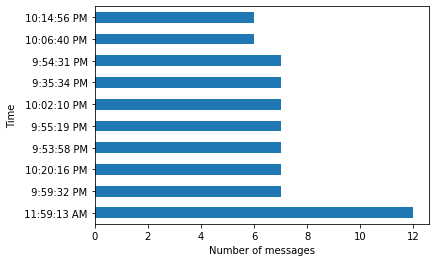

In [376]:
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')

### **The most happening day was -**

2019-07-26    720
2020-06-26    469
2020-04-06    436
2019-08-18    434
2019-08-12    410
             ... 
2019-04-28      1
2020-03-03      1
2019-04-15      1
2019-11-03      1
2019-09-16      1
Name: Date, Length: 392, dtype: int64


Text(0, 0.5, 'Date')

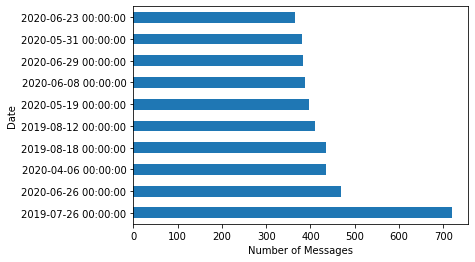

In [377]:
messages_df['Date'].value_counts().head(10).plot.barh()
print(messages_df['Date'].value_counts())
plt.xlabel('Number of Messages')
plt.ylabel('Date')

### **The early bird**

### The Late Owl

### **Message Having Maximum number of words**

In [378]:
messages_df.iloc[messages_df['Word_Count'].argmax()]

Date                                          2019-07-23 00:00:00
Time                                                  11:35:08 AM
Author                                          Aakarsh Yelisetty
Message         import java.util.*;\n  \n  \n // Warning: Prin...
emoji                                                          []
urlcount                                                        0
Letter_Count                                                 2402
Word_Count                                                    991
MessageCount                                                    1
emojicount                                                      0
Name: 6271, dtype: object

### **Word Cloud**

In [433]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))

There are 732775 words in all the messages.


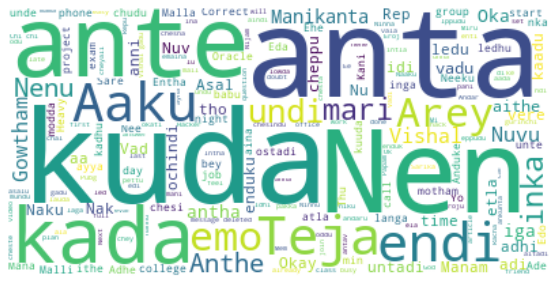

In [434]:
  stopwords = set(STOPWORDS)
  stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le","ni","lo","Ma","Haa","ni"])
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Author name Aakarsh Yelisetty


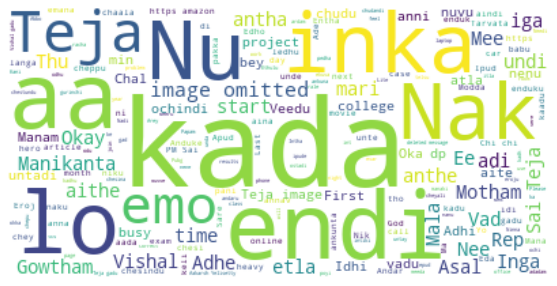

Author name Gowtham Vce


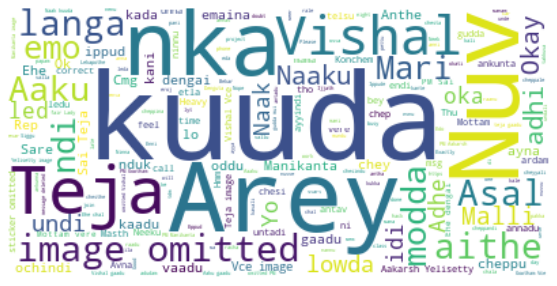

Author name Vishal Vce


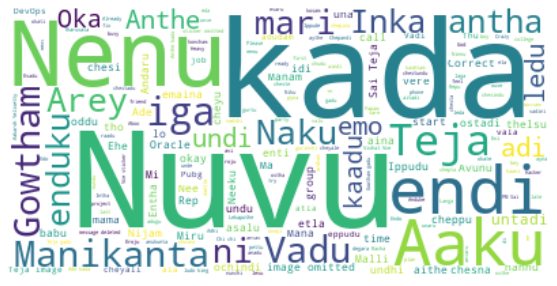

Author name Sai Teja


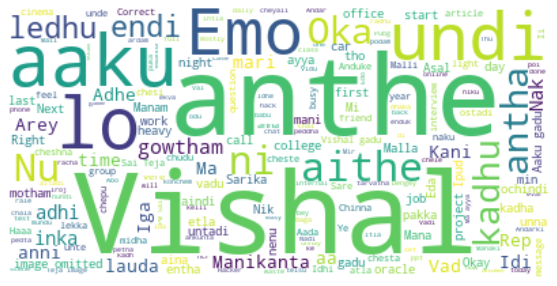

Author name Manikanta


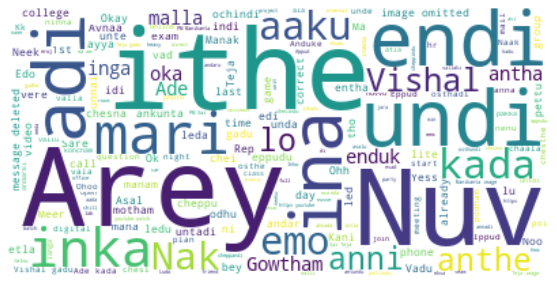

In [381]:
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","anta","kuda","ante","la","eh","Nen","ne","haa","Haa","le"])
  # Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [382]:
""

''